In [1]:
from __future__ import print_function, division
import numpy as np # manipulate data
import matplotlib.pyplot as plt # plotting
import scikits.audiolab as al # play sounds, only for python 2
from scipy import signal # window signal
import ipywidgets as widgets # interactive buttons
import matplotlib # plotting parameters
matplotlib.rcParams.update({'font.size': 18}) # enlarge font size

Some functions we'll use

In [2]:
fs=44100 # sampling rate Hz

### building blocks

def sinewave(freq, time):
    """Creates sine wave"""
    y = np.sin(2*np.pi*freq*time)
    w = signal.tukey(len(y)) # window the signal
    return y*w

def time_arr(tf, fs):
    """creates a time array fiven the sampling rate fs"""
    return np.linspace(0, tf, fs*tf)

def _round2int(x):
    return int(np.round(x))

round2int = np.vectorize(_round2int)

def playwave(f, tf=1):
    """plays sine wave with frequency f and duration tf"""
    t = time_arr(tf, fs)
    y = sinewave(f, t)
    al.play(y, fs=fs)


#### pitch and music theory

def key2frequency(n_key):
    """Returns the piano key given the frequency"""
    return 440.*2.**((n_key - 49.)/12.)

keys2frequencies = np.vectorize(key2frequency)

def frequency2key(n_key):
    """Returns the frequency of the n-th key"""
    return 12.*np.log2(f/440.) + 49.

frequencies2keys = np.vectorize(frequency2key)

def linear_piano_key2frequency(n_key):
    """Simulates the frequencies of a piano with linear intervals between notes
    Calibrate linear piano with A440, A880"""
    f = 440. / 12. * n_key + 440.*(1. - 49. / 12.)
    return f

linear_piano_keys2frequencies = np.vectorize(linear_piano_key2frequency)

## Music theory

def majorScaleKeys(n0=49, n_octaves=1):
    """Returns the keys of the major scale starting at n0
    TODO: generalise to more than one octave"""
    intervals = np.array([2, 2, 1, 2, 2, 2, 1])
    intervals_from_key = np.cumsum(intervals)
    keys = np.hstack((np.array([n0]), n0 + intervals_from_key))
    return keys

def majorScaleFreqs(n0=49, n_octaves=1):
    """Returns the frequencies of the major starting at the n0-th key"""
    keys = majorScaleKeys(n0=n0, n_octaves=n_octaves)
    return keys2frequencies(keys)

def linear_majorScaleFreqs(n0=49, n_octaves=1):
    """Returns the frequencies of the major starting at the n0-th key"""
    keys = majorScaleKeys(n0=n0, n_octaves=n_octaves)
    return linear_piano_key2frequency(keys)

def pioanokey2note():
    """TODO returns notes A A#Bb B..."""
    return 0
    
def calibrate_piano(note_key1, note_key2):
    """TODO
    Simulates the frequencies of a piano with linear intervals between notes
    Calibrate linear piano with A440, A880
    TODO note_ket = (key, freq)"""
    assert isintance(note_key1[0], int)
    assert isintance(note_key2[0], int)
    assert isintance(note_key1[1], float)
    assert isintance(note_key2[1], float)
    return 0
    f1, k1 = note_key1
    f2, k2 = note_key2

    f = (f2 - f1) / (k2 - k1) * n_key + b
    
    return f

# How would a world without logarithms look like? 

Author: Florencia Noriega, florencia.noriega@code.berlin

Here we listen to this world exploring the linear piano. 

## The linear piano

The linear piano is a deformation of the normal piano for beings who perceive sound frequencies linearly instead of logarithmically as we humans do. 
To understand the linear piano deformation, let's first look at how the normal piano works. 


### The piano

The piano (or any keyboard) is composed of blak an white keys that map to the 12 notes of the [chromatic scale](https://en.wikipedia.org/wiki/Chromatic_scale).
Every 12 notes we go back to the same note one octave higher.  The frequency of a note doubles from one octave to the next octave. For example, the frequency of A in the 3rd octave is 220 Hz and in the 4th octave is 440 Hz.

In the figure below the keys are grouped into nine octaves.
We can label the keys of the piano by their position; one for the first key, two for the second and so on. 
With such labelling, note C of the 4th octave, or C4, would be the 40th key of the piano and note A4 (A in the 4th octave) would be the 49th key.


https://en.wikipedia.org/wiki/Piano_key_frequencies 

<a title="AlwaysAngry [CC BY-SA 3.0 (https://creativecommons.org/licenses/by-sa/3.0)], via Wikimedia Commons" href="https://commons.wikimedia.org/wiki/File:Piano_Frequencies.svg"><img width="700" alt="Piano Frequencies" src="https://upload.wikimedia.org/wikipedia/commons/thumb/2/2e/Piano_Frequencies.svg/512px-Piano_Frequencies.svg.png"></a>


In [3]:
N_keys = 12 * 7 + 3 + 1
print('There are', N_keys, 'the keyboard')

There are 88 the keyboard


The intervals between the frequencies of the notes follow a logarithmic relation. 

Text(0,0.5,'Frequency (Hz)')

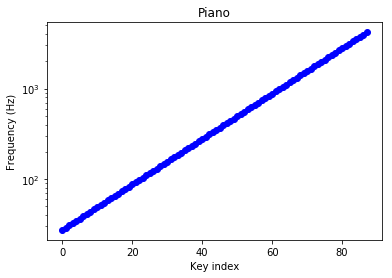

In [4]:
Mk = keys2frequencies(np.arange(1, N_keys+1))

plt.semilogy(Mk, 'bo')
#plt.plot(Mk, 'bo')
plt.title('Piano')
plt.xlabel('Key index')
plt.ylabel('Frequency (Hz)')

If these intervals would follow a linear relation, we would perceive sound in a completely different way. 

Text(0,0.5,'Frequency (Hz)')

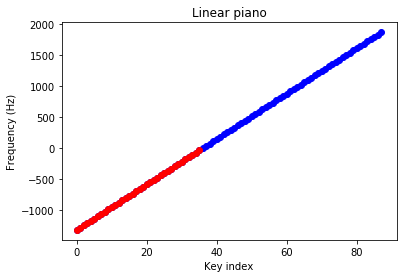

In [5]:
fr = linear_piano_key2frequency(np.arange(1, N_keys+1))

plt.plot(fr, 'bo')
plt.plot(fr[fr<0], 'ro')

plt.title('Linear piano')
plt.xlabel('Key index')
plt.ylabel('Frequency (Hz)')

The linear piano misses almost half of the notes.

In [6]:
np.argwhere(fr>0)[0:2]

array([[37],
       [38]])

### First five keys of the piano


In [7]:
## piano
piano_keys = [str(item) for item in round2int(keys2frequencies(np.arange(1,6)))]

## lienear piano
valid_linear_piano_keys = np.array( [item[0] for item in np.argwhere(fr>0)]) # keep only notes with positive frequency

linearPiano_keys = [str(item) for 
                    item in round2int(linear_piano_keys2frequencies(valid_linear_piano_keys[np.arange(5)]))]
print("Frequencies of the first keys\nPiano", piano_keys)
print("Linear piano", linearPiano_keys)

Frequencies of the first keys
Piano ['28', '29', '31', '33', '35']
Linear piano ['0', '37', '73', '110', '147']


Let's listen at them

First five, are the notes of the piano and last five are the first five notes of the linear piano.

In [8]:
buttons = widgets.ToggleButtons(
    options=piano_keys + linearPiano_keys,
    description='Frequency:',
)
    
def on_click(change):
    playwave(float(change['new']))
    
buttons.observe(on_click, 'value')
buttons

VG9nZ2xlQnV0dG9ucyhkZXNjcmlwdGlvbj11J0ZyZXF1ZW5jeTonLCBvcHRpb25zPSgnMjgnLCAnMjknLCAnMzEnLCAnMzMnLCAnMzUnLCAnMCcsICczNycsICc3MycsICcxMTAnLCAnMTQ3JynigKY=


# Play some notes

In [9]:
buttons = widgets.ToggleButtons(
    options=['22', '31','440', '880', '1760', '15000','390' ],
    description='Frequency:',
)
    
def on_click(change):
    playwave(float(change['new']))
    

buttons.observe(on_click, 'value')
buttons

VG9nZ2xlQnV0dG9ucyhkZXNjcmlwdGlvbj11J0ZyZXF1ZW5jeTonLCBvcHRpb25zPSgnMjInLCAnMzEnLCAnNDQwJywgJzg4MCcsICcxNzYwJywgJzE1MDAwJywgJzM5MCcpLCB2YWx1ZT0nMjLigKY=


In [10]:
buttons = widgets.ToggleButtons(
    options=['440', '880', '1320'],
    description='Frequency:',
)
    
def on_click(change):
    playwave(float(change['new']))
    

buttons.observe(on_click, 'value')
buttons

ToggleButtons(description=u'Frequency:', options=('440', '880', '1320'), value='440')

# Major scale

In [11]:
majorScale = [str(item) for item in round2int(majorScaleFreqs(n0=40))]

buttons = widgets.ToggleButtons(
    options=majorScale,
    description='Frequency:',
)
    
def on_click(change):
    playwave(float(change['new']))
    

buttons.observe(on_click, 'value')
buttons

VG9nZ2xlQnV0dG9ucyhkZXNjcmlwdGlvbj11J0ZyZXF1ZW5jeTonLCBvcHRpb25zPSgnMjYyJywgJzI5NCcsICczMzAnLCAnMzQ5JywgJzM5MicsICc0NDAnLCAnNDk0JywgJzUyMycpLCB2YWzigKY=


## Major scale in a world without logarithms

In [12]:
linear_majorScale = [str(item) for item in round2int(linear_majorScaleFreqs(n0=40))]

buttons = widgets.ToggleButtons(
    options = linear_majorScale, #['440', '494', '523', '587', '659', '698', '784', '880'],
    description='Frequency:',
)
    
def on_click(change):
    playwave(float(change['new']))
    

buttons.observe(on_click, 'value')
buttons

VG9nZ2xlQnV0dG9ucyhkZXNjcmlwdGlvbj11J0ZyZXF1ZW5jeTonLCBvcHRpb25zPSgnMTEwJywgJzE4MycsICcyNTcnLCAnMjkzJywgJzM2NycsICc0NDAnLCAnNTEzJywgJzU1MCcpLCB2YWzigKY=


# Play all keys

In [14]:
t = time_arr(0.5, fs)

for n in np.arange(35,60):
    f = key2frequency(n)
    print("key {}, frequency {:.1f} Hz".format(n, f))
    y = sinewave(f, t)
    al.play(y, fs=fs)


/Users/florencia/venvs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:13: DeprecationWarning: object of type <type 'float'> cannot be safely interpreted as an integer.
  del sys.path[0]


key 35, frequency 196.0 Hz
key 36, frequency 207.7 Hz
key 37, frequency 220.0 Hz
key 38, frequency 233.1 Hz
key 39, frequency 246.9 Hz
key 40, frequency 261.6 Hz
key 41, frequency 277.2 Hz
key 42, frequency 293.7 Hz
key 43, frequency 311.1 Hz
key 44, frequency 329.6 Hz
key 45, frequency 349.2 Hz
key 46, frequency 370.0 Hz
key 47, frequency 392.0 Hz
key 48, frequency 415.3 Hz
key 49, frequency 440.0 Hz
key 50, frequency 466.2 Hz
key 51, frequency 493.9 Hz
key 52, frequency 523.3 Hz
key 53, frequency 554.4 Hz
key 54, frequency 587.3 Hz
key 55, frequency 622.3 Hz
key 56, frequency 659.3 Hz
key 57, frequency 698.5 Hz
key 58, frequency 740.0 Hz
key 59, frequency 784.0 Hz


In [15]:
t = time_arr(0.5, fs)

for n in np.arange(35,60):
    f = linear_piano_key2frequency(n)
    print("key {}, frequency {:.1f} Hz".format(n, f))
    y = sinewave(f, t)
    al.play(y, fs=fs)

/Users/florencia/venvs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:13: DeprecationWarning: object of type <type 'float'> cannot be safely interpreted as an integer.
  del sys.path[0]


key 35, frequency -73.3 Hz
key 36, frequency -36.7 Hz
key 37, frequency 0.0 Hz
key 38, frequency 36.7 Hz
key 39, frequency 73.3 Hz
key 40, frequency 110.0 Hz
key 41, frequency 146.7 Hz
key 42, frequency 183.3 Hz
key 43, frequency 220.0 Hz
key 44, frequency 256.7 Hz
key 45, frequency 293.3 Hz
key 46, frequency 330.0 Hz
key 47, frequency 366.7 Hz
key 48, frequency 403.3 Hz
key 49, frequency 440.0 Hz
key 50, frequency 476.7 Hz
key 51, frequency 513.3 Hz
key 52, frequency 550.0 Hz
key 53, frequency 586.7 Hz
key 54, frequency 623.3 Hz
key 55, frequency 660.0 Hz
key 56, frequency 696.7 Hz
key 57, frequency 733.3 Hz
key 58, frequency 770.0 Hz
key 59, frequency 806.7 Hz
